In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\sarve\\Sarvesh and AI'

In [3]:
os.chdir("C:\\STUDY\\UPSHOT\\TELHOUSE\\")

In [ ]:
#STEP 1
#after loading the libraries and the needed models 
#load the dataset 
#verify the dataset
#statistical summary

In [4]:
df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.shape

(7043, 33)

In [6]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
#STEP 2
#data quality check
#data cleaning 
#identify incorrect data
#fix total charges , handle missing values and duplicate rows
#data quality verification for the last time

In [9]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct[missing_pct > 0]

Churn Reason    73.463013
dtype: float64

In [11]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [13]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip().str.replace(' ', '')
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong',
       'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason'],
      dtype='object')

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [18]:
df.isnull().sum()

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

In [19]:
df.isnull().sum().sum()

5174

In [20]:
df.duplicated().sum()

0

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [23]:
df.describe()

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,TotalCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [ ]:
#STEP 3
#exploratory data analysis
#churn vs tenure and key demographics of churn
#monthly and total charges
#internet service type and tech support
#tenure and churn , contract type vs churn

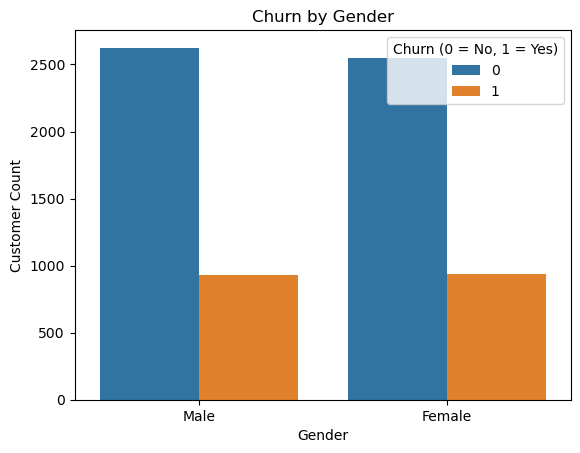

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='ChurnValue', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.show()

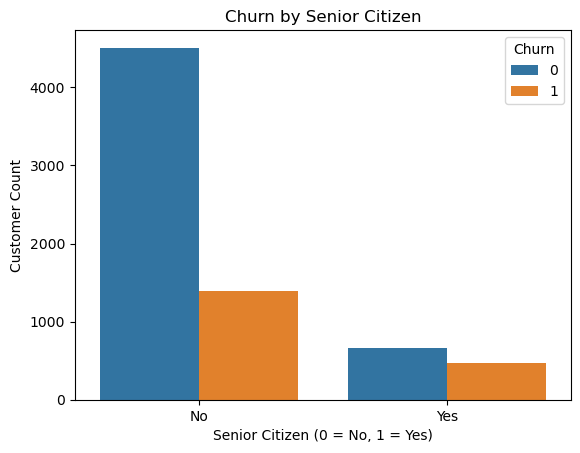

In [27]:
sns.countplot(x='SeniorCitizen', hue='ChurnValue', data=df)
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

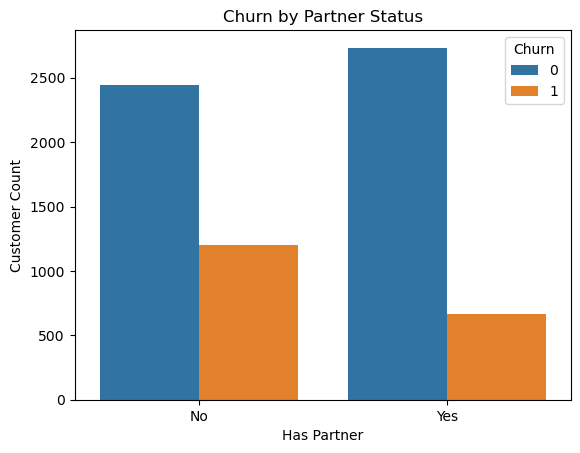

In [28]:
sns.countplot(x='Partner', hue='ChurnValue', data=df)
plt.title('Churn by Partner Status')
plt.xlabel('Has Partner')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

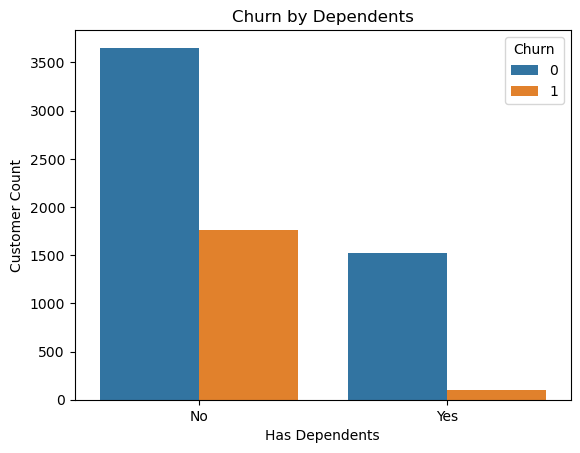

In [29]:
sns.countplot(x='Dependents', hue='ChurnValue', data=df)
plt.title('Churn by Dependents')
plt.xlabel('Has Dependents')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

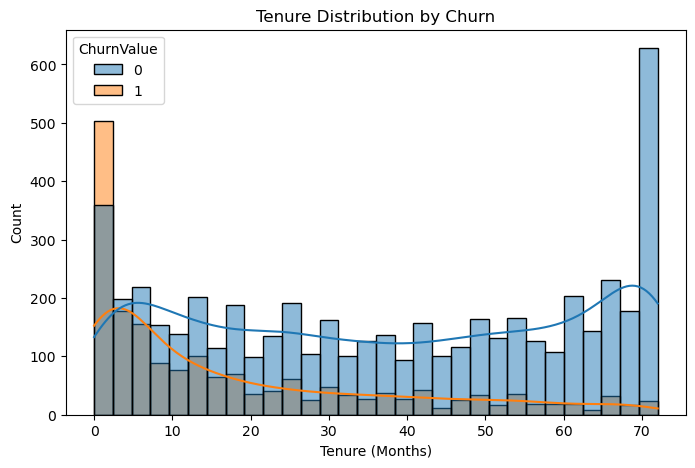

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TenureMonths', hue='ChurnValue', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

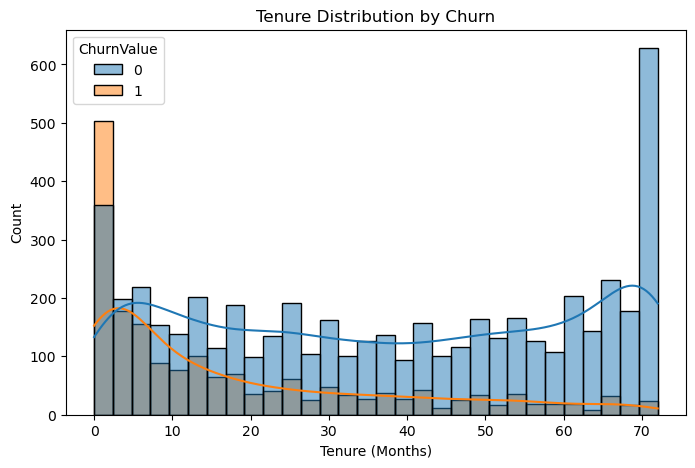

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TenureMonths', hue='ChurnValue', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

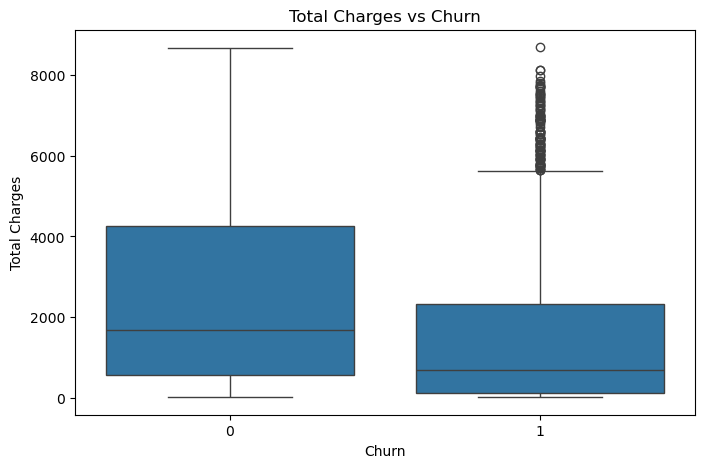

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ChurnValue', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

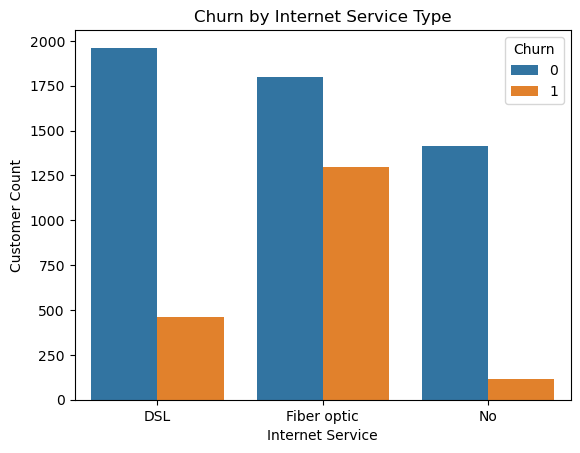

In [33]:
sns.countplot(x='InternetService', hue='ChurnValue', data=df)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

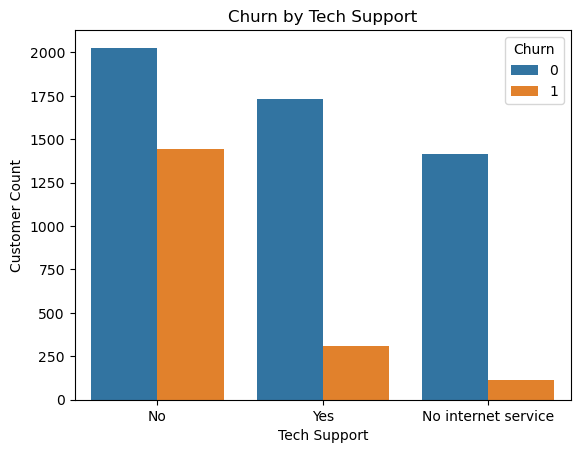

In [34]:
sns.countplot(x='TechSupport', hue='ChurnValue', data=df)
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

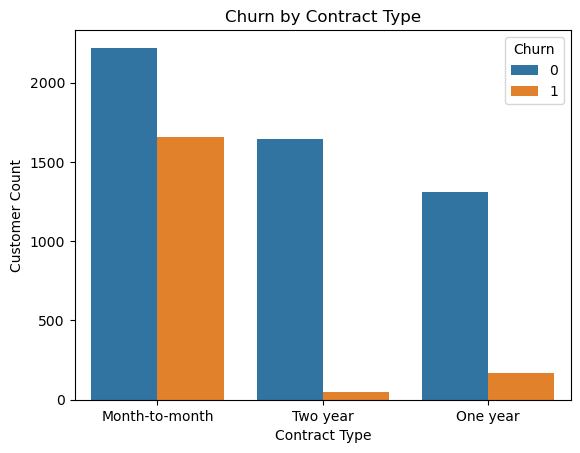

In [35]:
sns.countplot(x='Contract', hue='ChurnValue', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

In [ ]:
#STEP 4
#data cleaning and feature engineering
#drop irrelevant columns
#target variable separation
#identify categorical vs numerical features
#missing value handling
#feature scaling and encoding categorical variables
#train-test split

In [36]:
drop_cols = [
    'CustomerID',
    'Count',
    'Country',
    'State',
    'City',
    'ZipCode',
    'LatLong',
    'Latitude',
    'Longitude',
    'ChurnLabel',
    'ChurnScore',
    'CLTV',
    'ChurnReason'
]

df_model = df.drop(columns=drop_cols)

In [37]:
X = df_model.drop('ChurnValue', axis=1)
y = df_model['ChurnValue']

In [38]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

categorical_cols, numerical_cols

(['Gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['TenureMonths', 'MonthlyCharges', 'TotalCharges'])

In [39]:
X.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
TenureMonths        0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

In [41]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
#STEP 5
#statistical analysis 
#churn rate and churn class summary statistics
#distribution analysis
#correlation analysis
#outlier detection

In [44]:
churn_rate = y.value_counts(normalize=True)
churn_rate

ChurnValue
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [45]:
df_stats = df.groupby('ChurnValue')[[
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges'
]].describe()

df_stats

TenureMonths                                                     \
                  count       mean        std  min   25%   50%   75%   max   
ChurnValue                                                                   
0                5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1                1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

           MonthlyCharges             ...               TotalCharges  \
                    count       mean  ...   75%     max        count   
ChurnValue                            ...                              
0                  5174.0  61.265124  ...  88.4  118.75       5174.0   
1                  1869.0  74.441332  ...  94.2  118.35       1869.0   

                                                                         \
                   mean          std    min      25%       50%      75%   
ChurnValue                                                                
0           2552.882494  2327.590132  18.80  579.575  1679.525  4262.85   
1           1531.796094  1890.822994  18.85  134.500   703.550  2331.30   

                     
                max  
ChurnValue           
0           8672.45  
1           8684.80  

[2 rows x 24 columns]

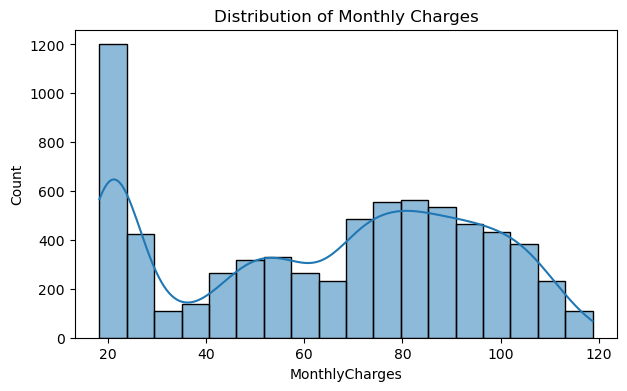

In [46]:
plt.figure(figsize=(7,4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

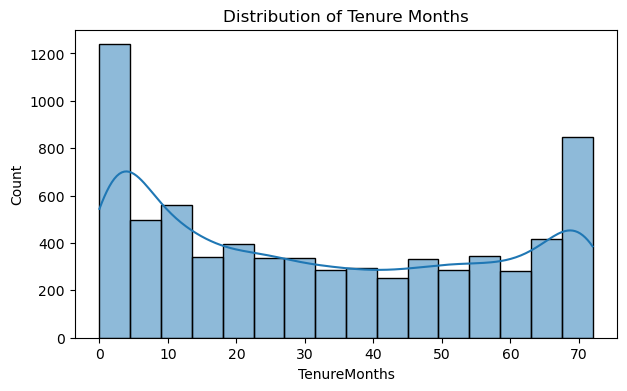

In [47]:
plt.figure(figsize=(7,4))
sns.histplot(df['TenureMonths'], kde=True)
plt.title('Distribution of Tenure Months')
plt.show()

In [49]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({'Yes': 1, 'No': 0})

In [50]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [51]:
corr_cols = [
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges',
    'SeniorCitizen',
    'ChurnValue'
]

corr_matrix = df[corr_cols].astype(float).corr()

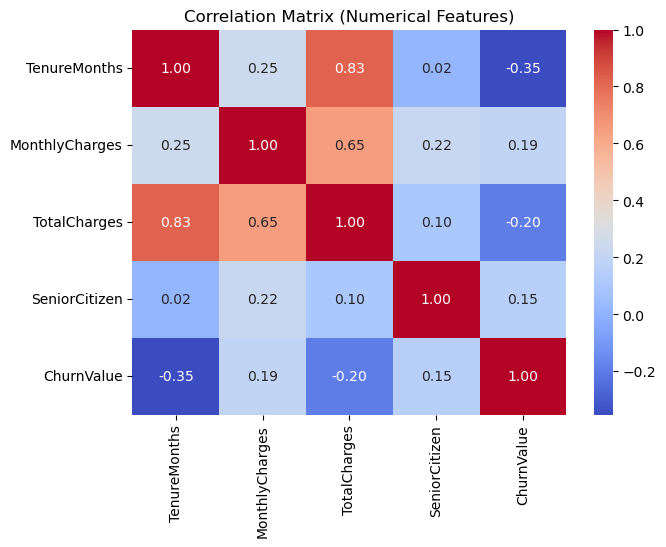

In [52]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

In [53]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['MonthlyCharges'] < Q1 - 1.5 * IQR) |
    (df['MonthlyCharges'] > Q3 + 1.5 * IQR)
]

outliers.shape

(0, 33)

In [ ]:
#STEP 6
#logistic regression
#predictions and confusion matrix
#roc curve and auc 
#feature importance

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
y_pred = log_reg.predict(X_test)

In [56]:
y_prob = log_reg.predict_proba(X_test)[:, 1]

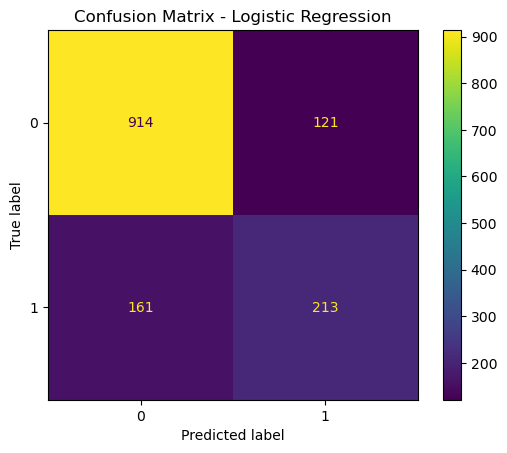

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



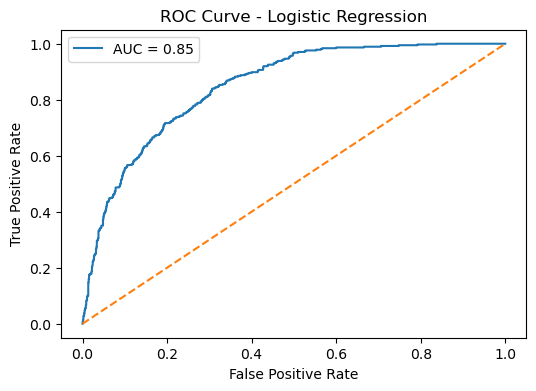

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [60]:
feature_importance = pd.Series(
    log_reg.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)

TenureMonths                  -1.258281
MonthlyCharges                -0.797388
InternetService_Fiber optic    0.699324
Dependents_Yes                -0.691160
Contract_Two year             -0.572569
TotalCharges                   0.507829
Contract_One year             -0.301423
StreamingTV_Yes                0.241622
StreamingMovies_Yes            0.231179
MultipleLines_Yes              0.214570
dtype: float64

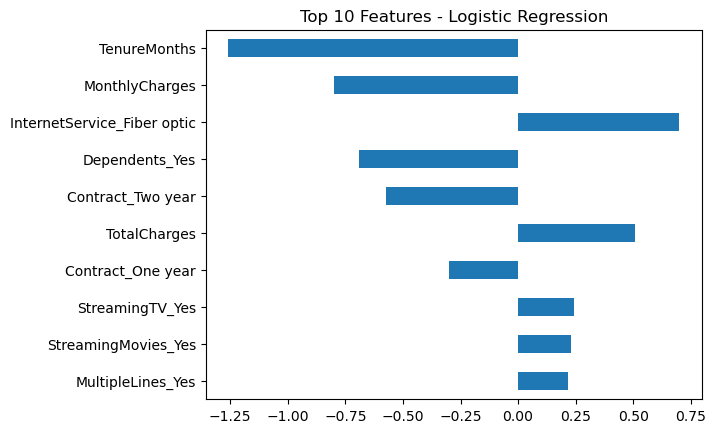

In [61]:
feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#STEP 7
#SUPPORT VECTOR MACHINE(SVM)
#predictions and evaluation metrics
#roc curve and auc 
#logistic regression vs svm

In [62]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [63]:
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

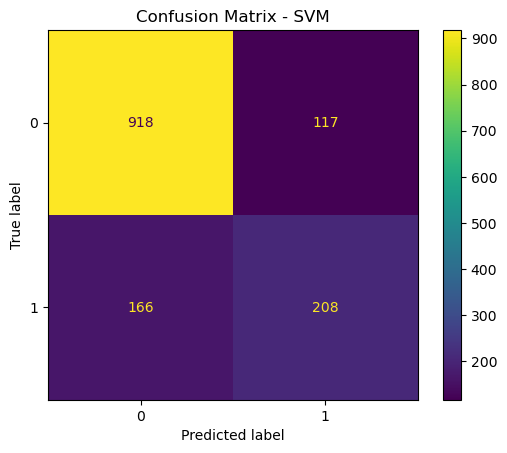

In [64]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title('Confusion Matrix - SVM')
plt.show()

In [65]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



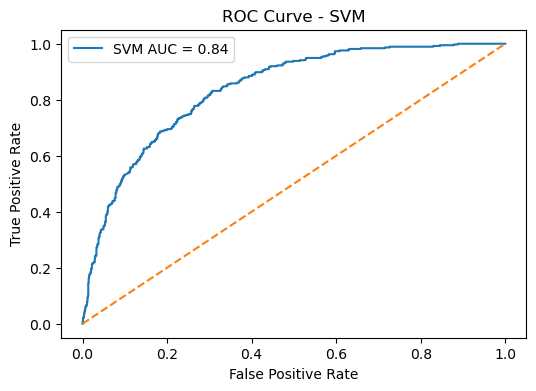

In [66]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

In [67]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM'],
    'AUC': [auc, auc_svm]
})

comparison

,Model,AUC
0,Logistic Regression,0.848568
1,SVM,0.837973


In [ ]:
#STEP 8
#k-means clustering
#scale and select features for clustering using the data
#elbow method
#train final k means model
#cluster profiling and visualise
#residual analysis

In [68]:
cluster_features = df[[
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges'
]]

In [69]:
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
cluster_scaled = scaler_cluster.fit_transform(cluster_features)

In [70]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    inertia.append(km.inertia_)

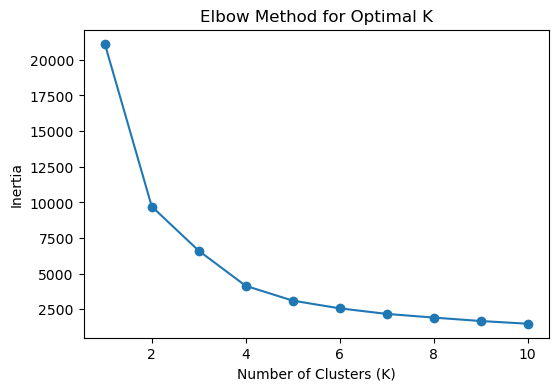

In [71]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

In [73]:
df.groupby('Cluster')[[
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges',
    'ChurnValue'
]].mean()

,TenureMonths,MonthlyCharges,TotalCharges,ChurnValue
Cluster,,,,
0,44.420231,29.615139,1342.399253,0.054311
1,10.741061,62.496111,753.224978,0.422825
2,57.141825,91.579291,5224.193225,0.167118


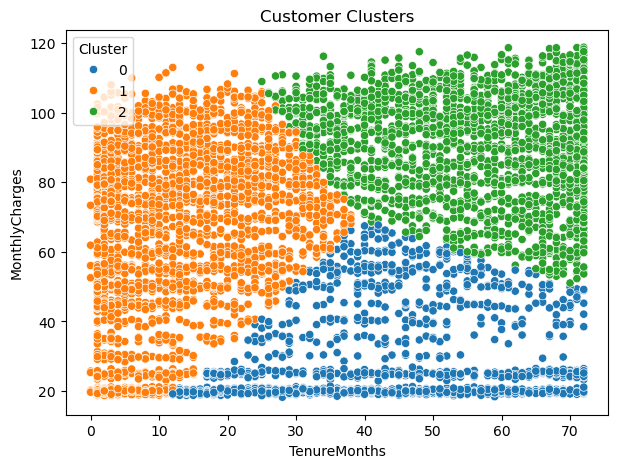

In [74]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='TenureMonths',
    y='MonthlyCharges',
    hue='Cluster',
    data=df,
    palette='tab10'
)
plt.title('Customer Clusters')
plt.show()

In [ ]:
#STEP 9
#linear regression
#prepare data and train test split
#scale features and train the model
#evaluate and r^2
#interpret coefficients

In [82]:
reg_features = df[[
    'TenureMonths',
    'SeniorCitizen',
    'TotalCharges'
]]



y_reg = df['MonthlyCharges']

In [77]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    reg_features,
    y_reg,
    test_size=0.2,
    random_state=42
)

In [78]:
from sklearn.preprocessing import StandardScaler

scaler_reg = StandardScaler()
Xr_train_scaled = scaler_reg.fit_transform(Xr_train)
Xr_test_scaled = scaler_reg.transform(Xr_test)

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xr_train_scaled, yr_train)

LinearRegression()

In [80]:
y_reg_pred = lin_reg.predict(Xr_test_scaled)

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(yr_test, y_reg_pred)
rmse = mean_squared_error(yr_test, y_reg_pred, squared=False)

r2, rmse

(0.6892260906775296, 16.49788298387371)

In [83]:
coef_df = pd.Series(
    lin_reg.coef_,
    index=reg_features.columns
).sort_values()

coef_df

TenureMonths    -26.451370
SeniorCitizen     2.787222
TotalCharges     41.299339
dtype: float64

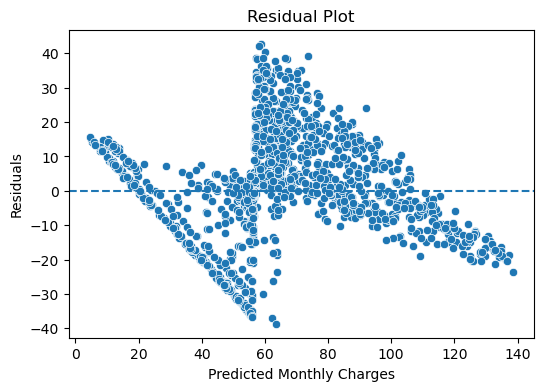

In [84]:
residuals = yr_test - y_reg_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_reg_pred, y=residuals)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted Monthly Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#STEP 10
#final evalutaion 
#model performance comparison

In [85]:
final_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Support Vector Machine',
        'K-Means (Segmentation)',
        'Linear Regression (Analysis)'
    ],
    'Purpose': [
        'Baseline churn prediction',
        'Margin-based churn prediction',
        'Customer segmentation',
        'Pricing & behavior analysis'
    ],
    'Key Metric': [
        f'AUC ≈ {auc:.2f}',
        f'AUC ≈ {auc_svm:.2f}',
        'Silhouette via cluster profiling',
        f'R² ≈ {r2:.2f}'
    ]
})

final_results

,Model,Purpose,Key Metric
0,Logistic Regression,Baseline churn prediction,AUC ≈ 0.85
1,Support Vector Machine,Margin-based churn prediction,AUC ≈ 0.84
2,K-Means (Segmentation),Customer segmentation,Silhouette via cluster profiling
3,Linear Regression (Analysis),Pricing & behavior analysis,R² ≈ 0.69
